#Project


##Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier

##Loading dataset

In [3]:
heart= pd.read_csv("https://raw.githubusercontent.com/mruganshi/MLP-from-Scratch/master/heart.csv")

In [4]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Preprocessing

##Converting the chest pain type encoded column to the real name of the chest pain

In [5]:
def chest_pain_type(title):
    if title =='ATA':
        return 'Atypical Angina'
    elif title=='TA':
        return 'Typical Angina'
    elif title=='NAP':
        return 'Non-Anginal Pain'
    elif title=='ASY':
        return 'Asymptomatic'
    else:
        return 'N/A'

In [6]:
heart['ChestPainType']=heart['ChestPainType'].apply(chest_pain_type)

##Checking for any null,NaN values

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##Plotting and visualizing of data

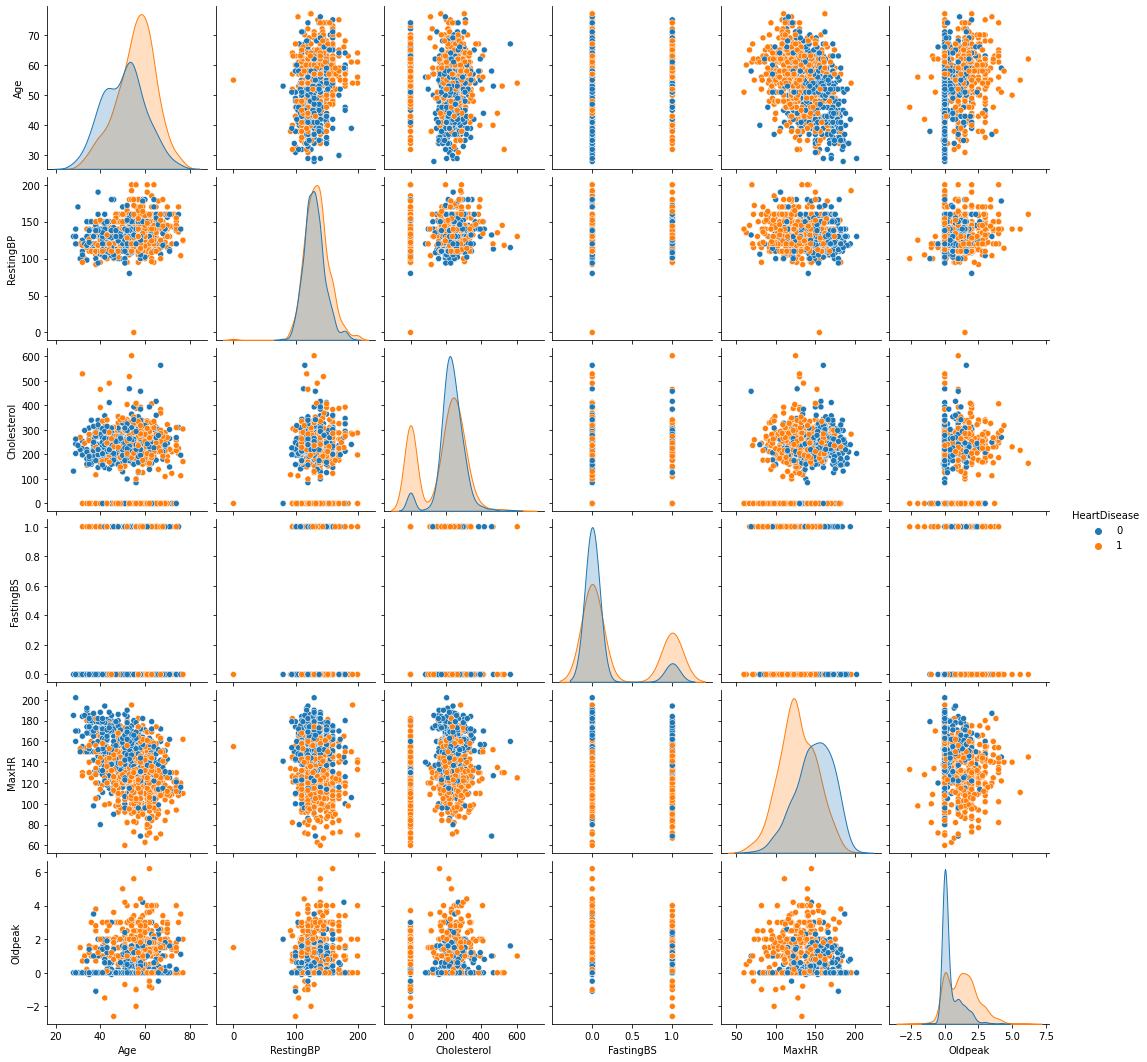

In [9]:
sns.pairplot(heart,hue="HeartDisease")

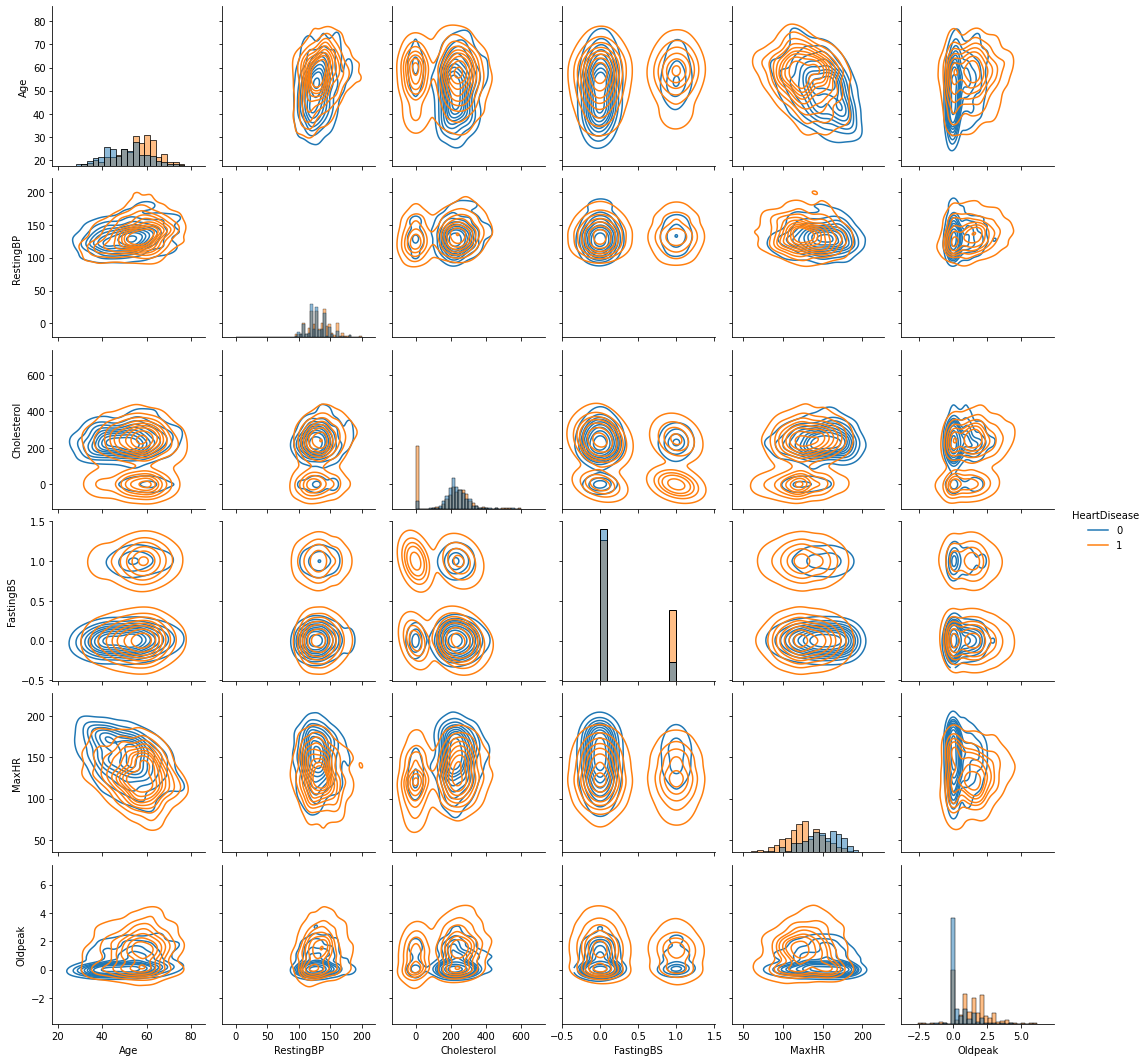

In [10]:
sns.pairplot(heart, hue="HeartDisease", diag_kind="hist",kind="kde")

### Count Plot for different features in the dataset

feature : sex

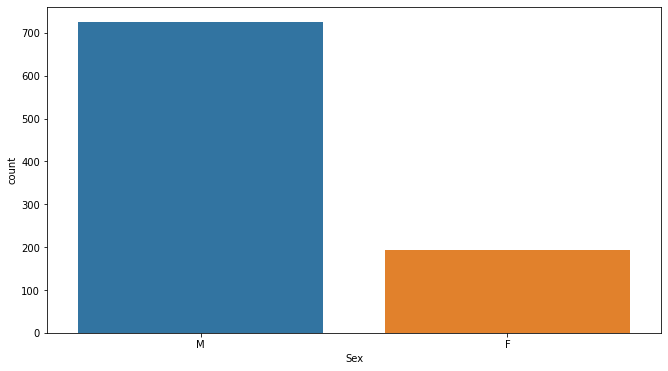

In [11]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x=heart.Sex)

feature: chest pain type

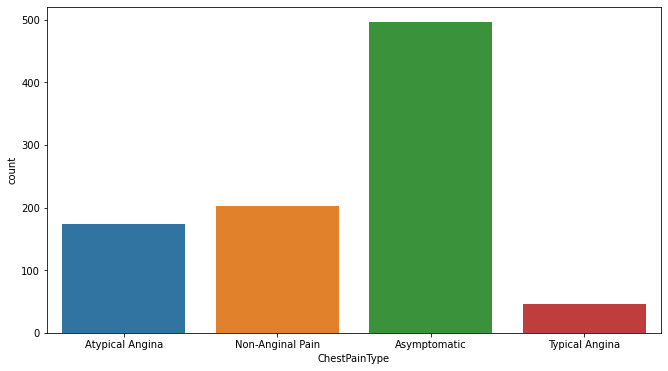

In [12]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x=heart.ChestPainType)

feature: resting ECG

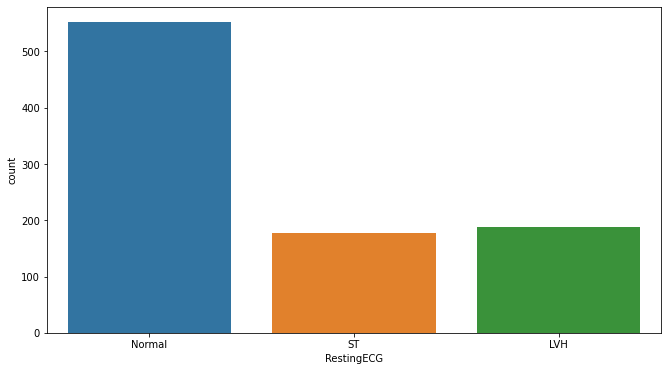

In [13]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x=heart.RestingECG)

feature: exercise angina

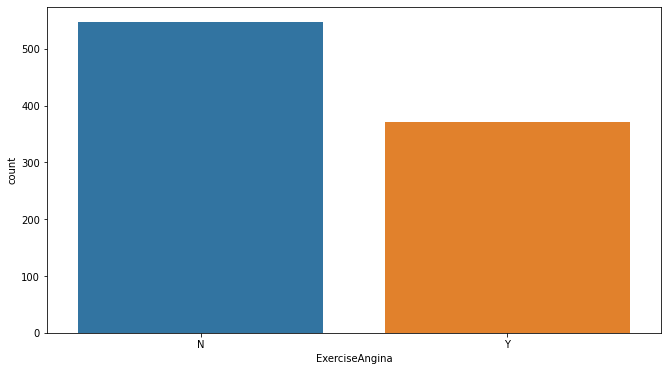

In [14]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x=heart.ExerciseAngina)

feature: st_slope

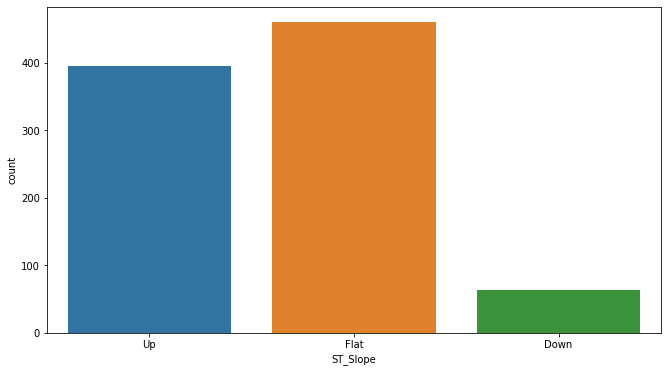

In [15]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x=heart.ST_Slope)

### Class-wise count plot for different features in the dataset

feature: sex

In [163]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=heart.Sex,color=heart.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

feature: chest pain type

In [17]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=heart.ChestPainType,color=heart.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

feature: resting Ecg

In [18]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=heart.RestingECG,color=heart.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

feature: exercise angina

In [19]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=heart.ExerciseAngina,color=heart.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

feature: st_slope

In [20]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=heart.ST_Slope,color=heart.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

### Age-wise frequency count for heart disease absent and heart disease present

In [21]:
k = np.unique(heart['Age'])

In [22]:
l_0 = []
l_1 = []
d=heart.iloc[:,[11]]
e=heart.iloc[:,[0]]
d=d.to_numpy()
e=e.to_numpy()
for j in k:
  p=[]
  count_0=0
  count_1=0
  for i in range(len(d)):
    if e[i]==j and d[i]==0:
      count_0+=1
    elif e[i]==j and d[i]==1:
      count_1+=1
  l_0.append(count_0)
  l_1.append(count_1)
  

<BarContainer object of 50 artists>

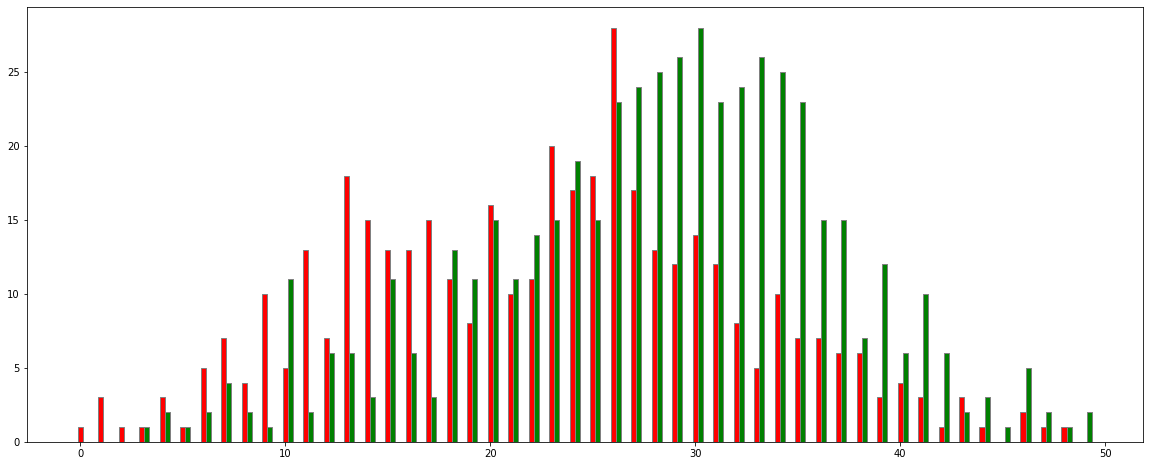

In [23]:
fig = plt.subplots(figsize =(20, 8))
barWidth = 0.25
br1 = np.arange(len(l_0))
br2 = [x + barWidth for x in br1]

plt.bar(br1, l_0, color ='r', width = barWidth,
        edgecolor ='grey', label ='no_heart_disease')
plt.bar(br2,l_1, color ='g', width = barWidth,
        edgecolor ='grey', label ='yes_heart_disease')

### checking correlation of dependent and independent features

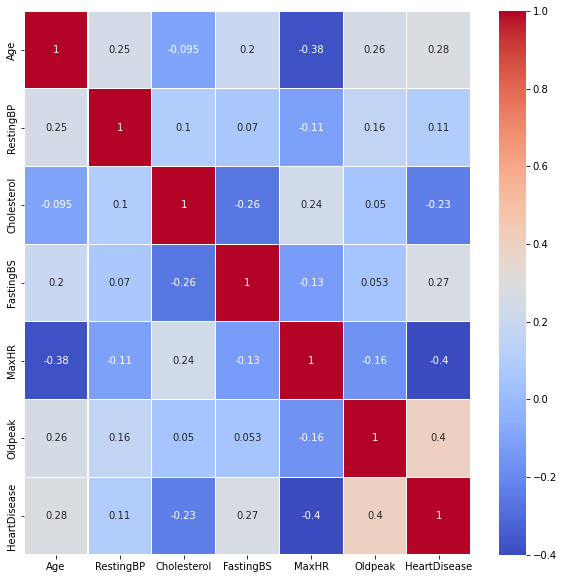

In [24]:
names=heart.columns
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Correlation plot
df_corr = heart.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

###Ordinal encoding of columns with feature values of object type

In [25]:
from sklearn.preprocessing import OrdinalEncoder
orcode = OrdinalEncoder()

In [26]:
heart[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]= orcode.fit_transform(heart[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

In [27]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0,1


###Density Plot for numeric features

In [28]:
cols=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

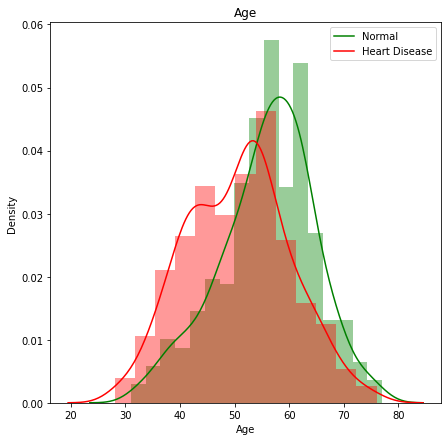

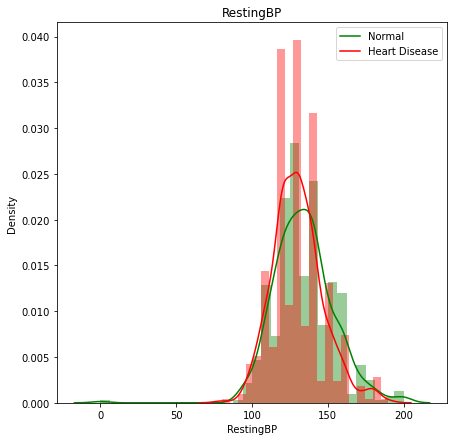

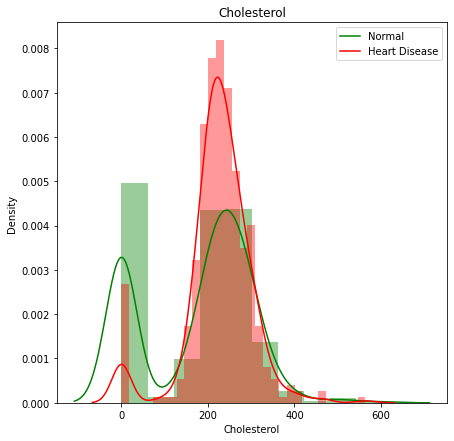

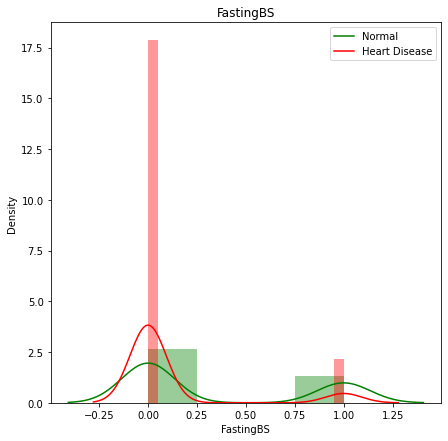

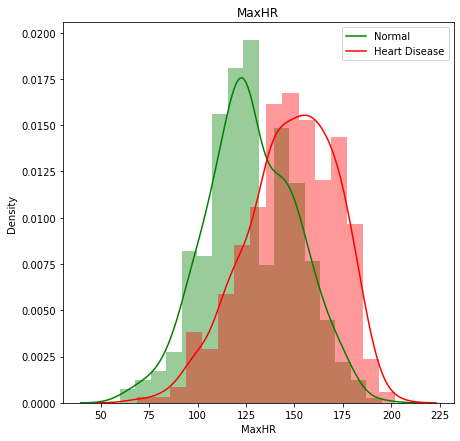

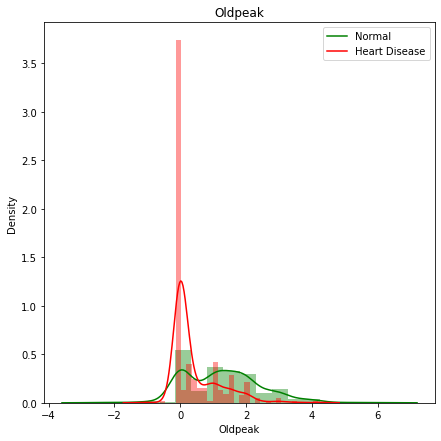

In [29]:

for c in cols:
    plt.figure(figsize=(7,7))
    sns.distplot(heart.loc[heart['HeartDisease']==1][c],kde_kws={'label':'Heart Disease'},color='green')
    sns.distplot(heart.loc[heart['HeartDisease']==0][c],kde_kws={'label':'Normal'},color='red')
    
    plt.legend(labels=['Normal','Heart Disease'])
    plt.title(c)

###Box Plots to visualize outliers

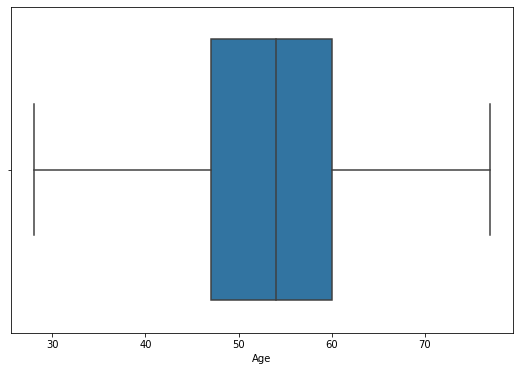

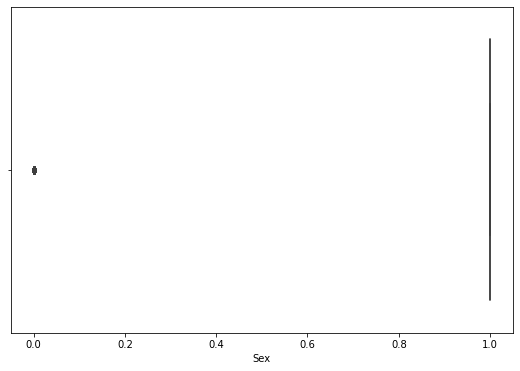

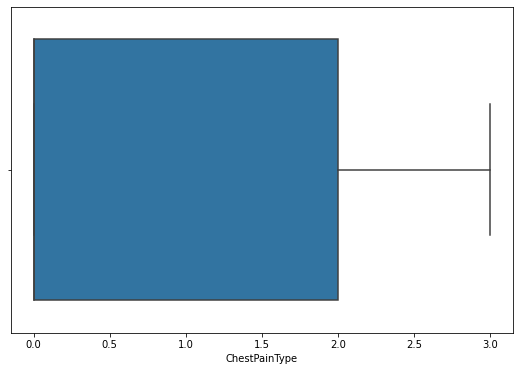

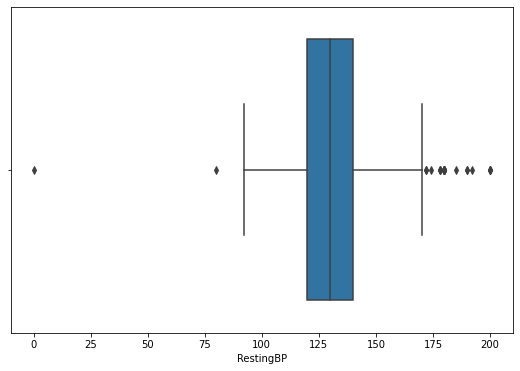

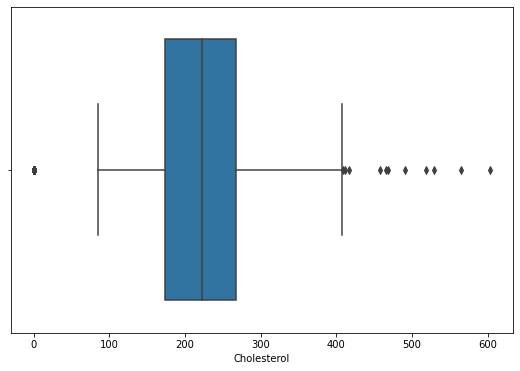

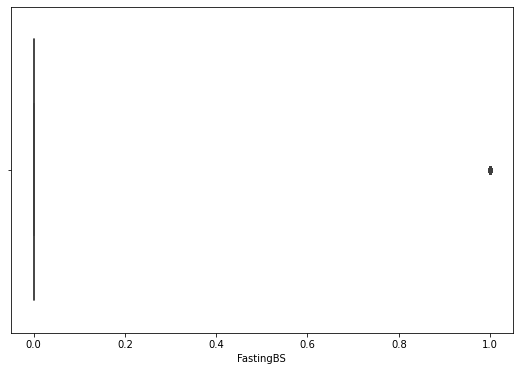

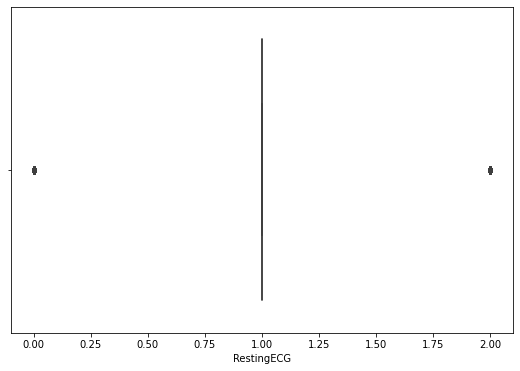

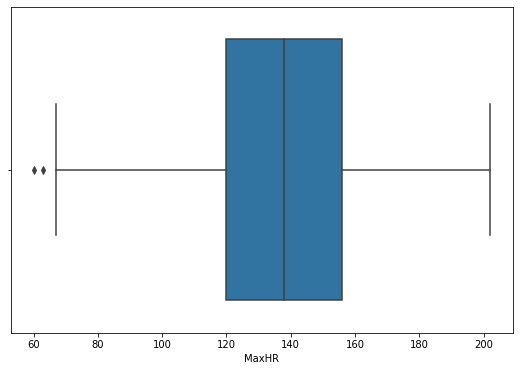

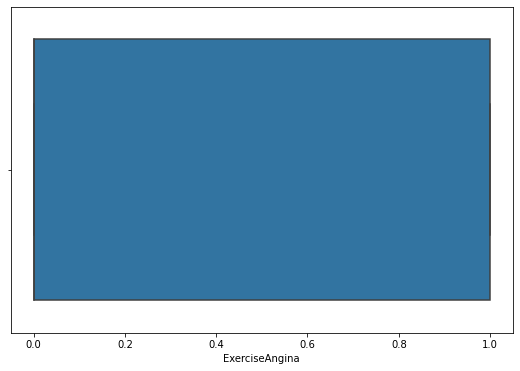

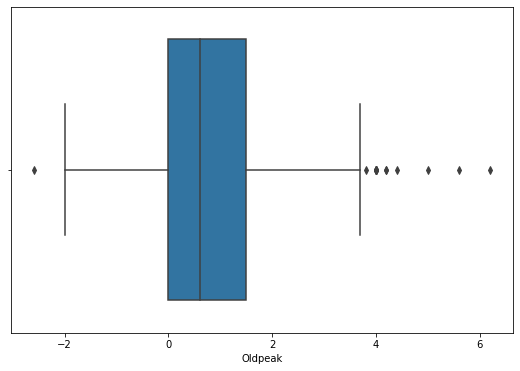

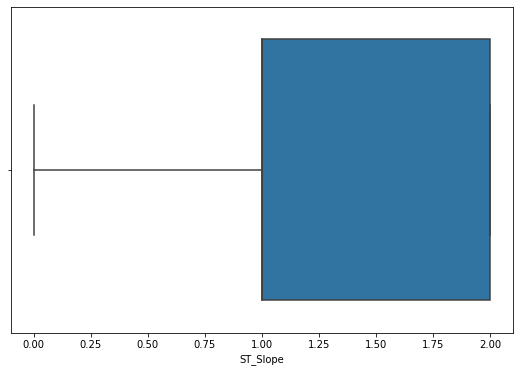

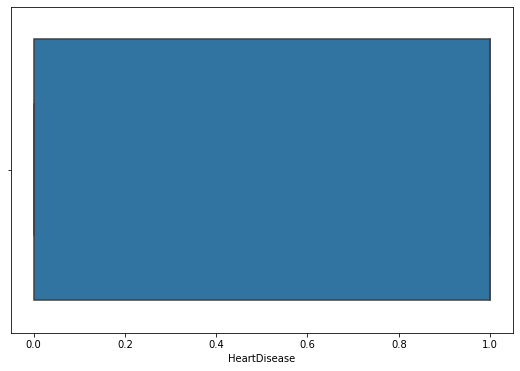

In [30]:
for c in names:
    fig=plt.figure(figsize=(9,6))
    sns.boxplot(x=heart[c],hue=heart.HeartDisease)

##Splitting the data into train and test data

In [86]:
from sklearn.model_selection import train_test_split
x=heart.drop(columns=['HeartDisease'],axis=1)
y=heart['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [164]:
len(x_train)

642

In [165]:
len(x_test)

276

In [166]:
len(y_train)

642

In [167]:
len(y_test)

276

# Model fitting to predict heart failure 

### Decision Tree

In [87]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train, y_train)
test_pred_decision_tree = clf.predict(x_test)
acc_decision_tree=accuracy_score(y_test,test_pred_decision_tree)*100
acc_decision_tree

77.89855072463769

### KNN

In [88]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)
test_pred_knn = neigh.predict(x_test)
acc_knn=accuracy_score(y_test,test_pred_knn)*100
acc_knn

70.65217391304348

### Gradient boosting 

In [89]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
test_pred_gbc = gbc.predict(x_test)
acc_gbc=accuracy_score(y_test,test_pred_gbc)*100
acc_gbc

88.40579710144928

### Gaussian Naivebayes

In [90]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
test_pred_gnb = gnb.predict(x_test)
acc_gnb=accuracy_score(y_test,test_pred_gnb)*100
acc_gnb

85.14492753623189

### Logistic Regression

In [91]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
test_pred_lr = lr.predict(x_test)
acc_lr=accuracy_score(y_test,test_pred_lr)*100
acc_lr

86.59420289855072

### Multilayer Perceptron

In [92]:
from sklearn.neural_network import MLPClassifier
percep = MLPClassifier()
percep.fit(x_train,y_train)
test_pred_percep = lr.predict(x_test)
acc_percep=accuracy_score(y_test,test_pred_percep)*100
acc_percep

86.59420289855072

### K-means

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train,y_train)
test_pred_km = kmeans.predict(x_test)
acc_km=accuracy_score(y_test,test_pred_km)*100
acc_km

54.710144927536234

### Random Forest Regression

In [98]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier()
regr.fit(x_train,y_train)
test_pred_regr = regr.predict(x_test)
acc_regr=accuracy_score(y_test,test_pred_regr)*100
acc_regr

88.76811594202898

### Comparison

In [168]:
Models1=pd.DataFrame({'Models':['Decision Tree Classifier','KNeighbors','GradientBoosting','Gaussian Naivebayes','Logistic Regression','Multilayer Perceptron','K-means','Random forest regressor'],
                     'accuracy_Score':[acc_decision_tree,acc_knn,acc_gbc,acc_gnb,acc_lr,acc_percep,acc_km,acc_regr]
                    })
Models1

,Models,accuracy_Score
0,Decision Tree Classifier,77.898551
1,KNeighbors,70.652174
2,GradientBoosting,88.405797
3,Gaussian Naivebayes,85.144928
4,Logistic Regression,86.594203
5,Multilayer Perceptron,86.594203
6,K-means,54.710145
7,Random forest regressor,88.768116


# Hyperparameter tuning

### Decision Tree

In [100]:
from sklearn.metrics import mean_squared_error as mse

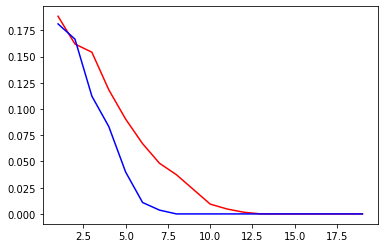

In [101]:
max_possible_depths=range(1,20)   #varying parameter max_depth

training=[]
for max_depth in max_possible_depths:
  m1=DecisionTreeClassifier(max_depth=max_depth)
  m1.fit(x_train,y_train)
  training.append(mse(y_train,m1.predict(x_train)))

testing=[]
for max_depth in max_possible_depths:
  m2=DecisionTreeClassifier(max_depth=max_depth)
  m2.fit(x_test,y_test)
  testing.append(mse(y_test,m2.predict(x_test)))

plt.plot(max_possible_depths, training, color='red', label='Training Error')
plt.plot(max_possible_depths, testing, color='blue', label='Testing Error')

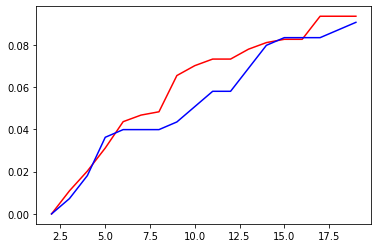

In [102]:
min_possible_samples=range(2,20)         #varying parameter min_samples_split

training=[]
for min_sample in min_possible_samples:
  m1=DecisionTreeClassifier(min_samples_split=min_sample)
  m1.fit(x_train,y_train)
  training.append(mse(y_train,m1.predict(x_train)))

testing=[]
for min_sample in min_possible_samples:
  m2=DecisionTreeClassifier(min_samples_split=min_sample)
  m2.fit(x_test,y_test)
  testing.append(mse(y_test,m2.predict(x_test)))

plt.plot(min_possible_samples, training, color='red', label='Training Error')
plt.plot(min_possible_samples, testing, color='blue', label='Testing Error')

In [103]:
clf2 = DecisionTreeClassifier(random_state = 0,max_depth=9,min_samples_split=8)           #making predictions on x_test using the best parameters obtained
clf2.fit(x_train, y_train)
test_pred_decision_tree2 = clf2.predict(x_test)
acc_decision_tree2=accuracy_score(y_test,test_pred_decision_tree2)*100
acc_decision_tree2

80.43478260869566

### KNN

In [104]:
from sklearn.model_selection import GridSearchCV                               #finding best parameters using gridsearchCV for different parameters
grid_params = { 'n_neighbors' : [i for i in range(3,20)],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=7, n_jobs = -1)
g_res = gs.fit(x_train, y_train)
knn_pred = g_res.predict(x_test)
knn_grid = accuracy_score(y_test,knn_pred)*100
print(knn_grid)
g_res.best_params_

Fitting 7 folds for each of 102 candidates, totalling 714 fits
74.27536231884058


{'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}

### Gradient boosting

In [105]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}           #finding best parameters using gridsearchCV for different parameters
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10),param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
g_res_grad = gsearch2.fit(x_train, y_train)
gb_pred = g_res_grad.predict(x_test)
gb_grid = accuracy_score(y_test,gb_pred)*100
g_res.best_params_
gb_grid

87.68115942028986

### Gaussian Naivebayes

In [106]:
param_grid_nb = {                                                                   #setting the parameters to choose from
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [107]:
from sklearn.naive_bayes import GaussianNB                                             #finding best parameters using gridsearchCV for different parameters
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
gn_pred = nbModel_grid.predict(x_test)
gn_grid = accuracy_score(y_test,gn_pred)*100
gn_grid

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


85.5072463768116

### Logistic Regression

In [108]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()                                                                 #finding best parameters using gridsearchCV for different parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
grid_pred = grid_result.predict(x_test)
lr_grid = accuracy_score(y_test,grid_pred)*100
lr_grid

85.14492753623189

### Multilayer Perceptron

In [109]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],                            #setting the parameters to choose from
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)                                          #finding best parameters using gridsearchCV for different parameters
mp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
mp.fit(x_train,y_train)
mppp = mp.predict(x_test)
mpp = accuracy_score(y_test,mppp)*100
mpp

81.52173913043478

### K-means

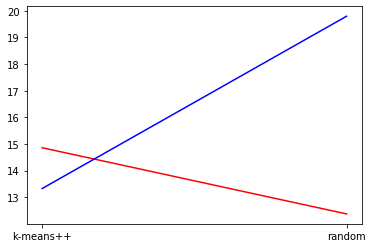

In [144]:
i= ['k-means++', 'random']
                                                              #varying parameter init
training=[]
for c in i:
  m1=KMeans(init=c)
  m1.fit(x_train,y_train)
  training.append(mse(y_train,m1.predict(x_train)))

testing=[]
for c in i:
  m2=KMeans(init=c)
  m2.fit(x_test,y_test)
  testing.append(mse(y_test,m2.predict(x_test)))

plt.plot(i, training, color='red', label='Training Error')
plt.plot(i, testing, color='blue', label='Testing Error')

In [145]:
clf4 = KMeans(n_clusters=2,init='k-means++')                     #making predictions on x_test using the best parameters obtained
clf4.fit(x_train, y_train)
test_pred4 = clf4.predict(x_test)
acc4=accuracy_score(y_test,test_pred4)*100
acc4

54.710144927536234

### Random forest regressor

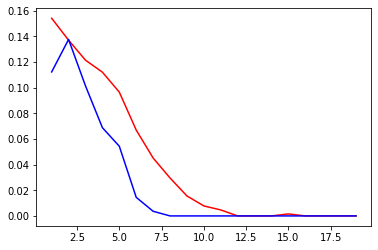

In [120]:
max_possible_depths=range(1,20)                                    #varying parameter max_depth

training=[]
for max_depth in max_possible_depths:
  m1=RandomForestClassifier(max_depth=max_depth)
  m1.fit(x_train,y_train)
  training.append(mse(y_train,m1.predict(x_train)))

testing=[]
for max_depth in max_possible_depths:
  m2=RandomForestClassifier(max_depth=max_depth)
  m2.fit(x_test,y_test)
  testing.append(mse(y_test,m2.predict(x_test)))

plt.plot(max_possible_depths, training, color='red', label='Training Error')
plt.plot(max_possible_depths, testing, color='blue', label='Testing Error')

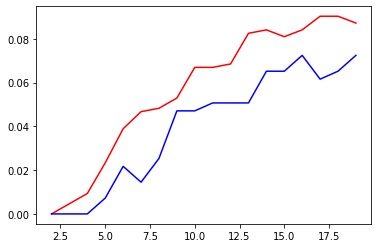

In [121]:
min_possible_samples=range(2,20)                                 #varying parameter min_samples_split

training=[]
for min_sample in min_possible_samples:
  m1=RandomForestClassifier(min_samples_split=min_sample)
  m1.fit(x_train,y_train)
  training.append(mse(y_train,m1.predict(x_train)))

testing=[]
for min_sample in min_possible_samples:
  m2=RandomForestClassifier(min_samples_split=min_sample)
  m2.fit(x_test,y_test)
  testing.append(mse(y_test,m2.predict(x_test)))

plt.plot(min_possible_samples, training, color='red', label='Training Error')
plt.plot(min_possible_samples, testing, color='blue', label='Testing Error')

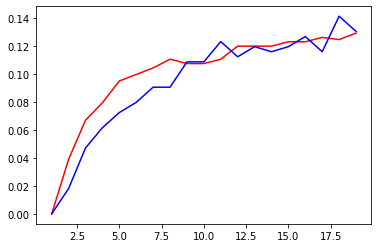

In [122]:
min_possible_leaf=range(1,20)                                            #varying parameter min_samples_leaf

training=[]
for min_sample in min_possible_leaf:
  m1=RandomForestClassifier(min_samples_leaf=min_sample)
  m1.fit(x_train,y_train)
  training.append(mse(y_train,m1.predict(x_train)))

testing=[]
for min_sample in min_possible_leaf:
  m2=RandomForestClassifier(min_samples_leaf=min_sample)
  m2.fit(x_test,y_test)
  testing.append(mse(y_test,m2.predict(x_test)))

plt.plot(min_possible_leaf, training, color='red', label='Training Error')
plt.plot(min_possible_leaf, testing, color='blue', label='Testing Error')

In [123]:
clf3 = RandomForestClassifier(random_state = 0,max_depth=10,min_samples_split=10,min_samples_leaf=3)         #making predictions on x_test using the best parameters obtained
clf3.fit(x_train, y_train)
test_pred3 = clf3.predict(x_test)
acc3=accuracy_score(y_test,test_pred3)*100
acc3

86.95652173913044

### comparing accuracy after hyperparameter tuning

In [124]:
plot = ["before","after"]

decision tree

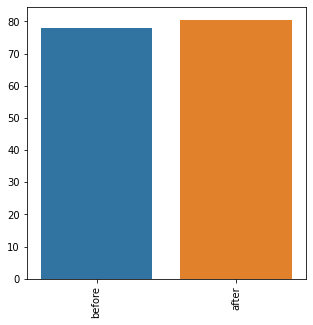

In [125]:
dt=[acc_decision_tree,acc_decision_tree2]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=dt)
plt.xticks(rotation=90)
fig.show()

KNeighbors

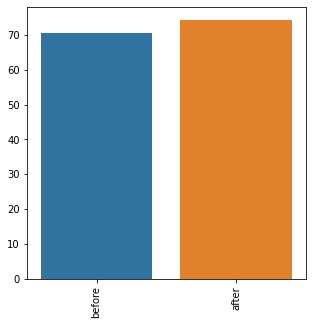

In [126]:
kn=[acc_knn,knn_grid]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=kn)
plt.xticks(rotation=90)
fig.show()

GradientBoosting

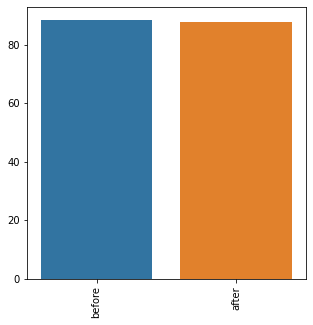

In [127]:
gb=[acc_gbc,gb_grid]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=gb)
plt.xticks(rotation=90)
fig.show()

Gaussian Naivebayes

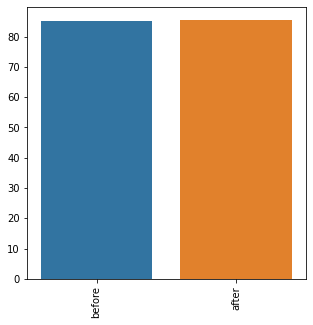

In [128]:
gn=[acc_gnb,gn_grid]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=gn)
plt.xticks(rotation=90)
fig.show()

Logistic Regression

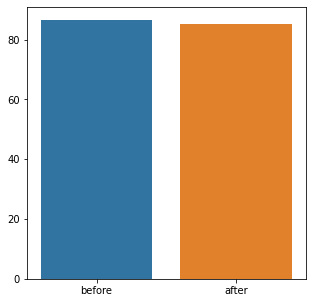

In [129]:
lr=[acc_lr,lr_grid]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=lr)
plt.show()

Multilayer Perceptron

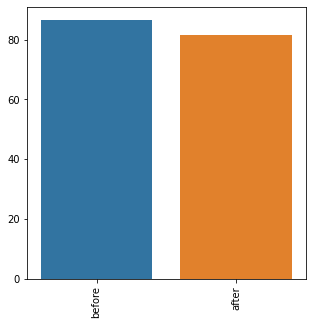

In [130]:
m=[acc_percep,mpp]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=m)
plt.xticks(rotation=90)
fig.show()

K-means

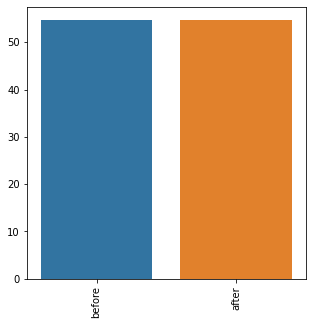

In [136]:
km=[acc_km,acc4]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=km)
plt.xticks(rotation=90)
fig.show()

Random forest regressor

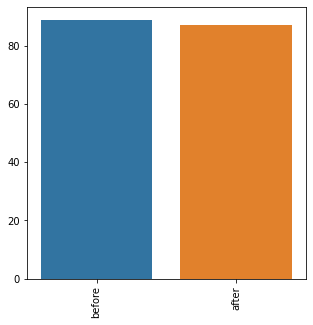

In [137]:
rf=[acc_regr,acc3]
fig=plt.figure(figsize=(5,5))
sns.barplot(x=plot,y=rf)
plt.xticks(rotation=90)
fig.show()

## Comparison

In [138]:
Models=pd.DataFrame({'Models':['Decision Tree Classifier','KNeighbors','GradientBoosting','Gaussian Naivebayes','Logistic Regression','Multilayer Perceptron','K-means','Random forest regressor'],
                    'Final_Score':[acc_decision_tree2,knn_grid,gb_grid,gn_grid,lr_grid,mpp,acc4,acc3],
                     'Initial_Score':[acc_decision_tree,acc_knn,acc_gbc,acc_gnb,acc_lr,acc_percep,acc_km,acc_regr]
                    })

In [139]:
Models

,Models,Final_Score,Initial_Score
0,Decision Tree Classifier,80.434783,77.898551
1,KNeighbors,74.275362,70.652174
2,GradientBoosting,87.681159,88.405797
3,Gaussian Naivebayes,85.507246,85.144928
4,Logistic Regression,85.144928,86.594203
5,Multilayer Perceptron,81.521739,86.594203
6,K-means,54.710145,54.710145
7,Random forest regressor,86.956522,88.768116


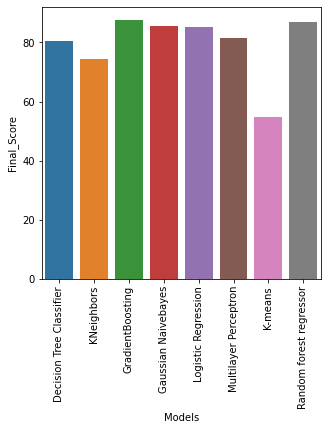

In [146]:
fig=plt.figure(figsize=(5,5))
sns.barplot(x=Models.Models,y=Models.Final_Score)
plt.xticks(rotation=90)
fig.show()

### ROC 

decision tree classifier

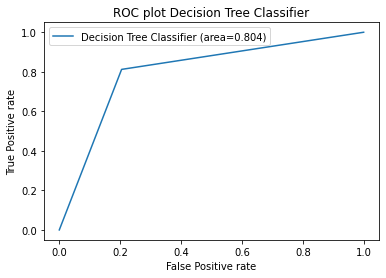

In [147]:
r_fpr,r_tpr,_=roc_curve(y_test,test_pred_decision_tree2)
r_auc=roc_auc_score(y_test,test_pred_decision_tree2)
plt.plot(r_fpr,r_tpr,label='Decision Tree Classifier (area={:.3f})'.format(r_auc))
plt.title('ROC plot Decision Tree Classifier')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

knn

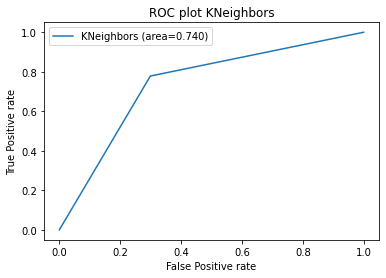

In [148]:
r_fpr,r_tpr,_=roc_curve(y_test,g_res.predict(x_test))
r_auc=roc_auc_score(y_test,g_res.predict(x_test))
plt.plot(r_fpr,r_tpr,label='KNeighbors (area={:.3f})'.format(r_auc))
plt.title('ROC plot KNeighbors')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

GradientBoosting

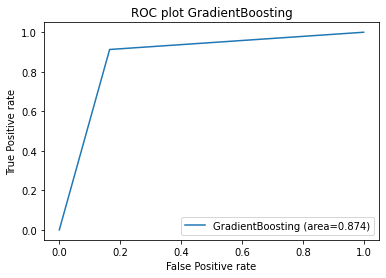

In [149]:
r_fpr,r_tpr,_=roc_curve(y_test,g_res_grad.predict(x_test))
r_auc=roc_auc_score(y_test,g_res_grad.predict(x_test))
plt.plot(r_fpr,r_tpr,label='GradientBoosting (area={:.3f})'.format(r_auc))
plt.title('ROC plot GradientBoosting')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Gaussian Naivebayes

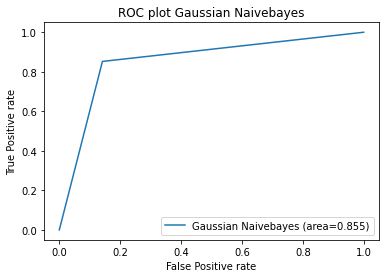

In [150]:
r_fpr,r_tpr,_=roc_curve(y_test,nbModel_grid.predict(x_test))
r_auc=roc_auc_score(y_test,nbModel_grid.predict(x_test))
plt.plot(r_fpr,r_tpr,label='Gaussian Naivebayes (area={:.3f})'.format(r_auc))
plt.title('ROC plot Gaussian Naivebayes')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Logistic Regression

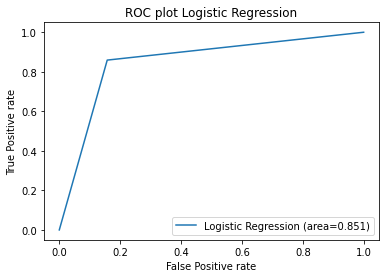

In [151]:
r_fpr,r_tpr,_=roc_curve(y_test,grid_result.predict(x_test))
r_auc=roc_auc_score(y_test,grid_result.predict(x_test))
plt.plot(r_fpr,r_tpr,label='Logistic Regression (area={:.3f})'.format(r_auc))
plt.title('ROC plot Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Multilayer Perceptron

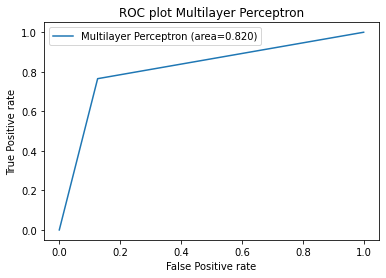

In [152]:
r_fpr,r_tpr,_=roc_curve(y_test,mp.predict(x_test))
r_auc=roc_auc_score(y_test,mp.predict(x_test))
plt.plot(r_fpr,r_tpr,label='Multilayer Perceptron (area={:.3f})'.format(r_auc))
plt.title('ROC plot Multilayer Perceptron')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

K-means

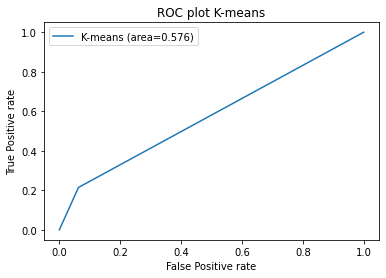

In [153]:
r_fpr,r_tpr,_=roc_curve(y_test,test_pred4)
r_auc=roc_auc_score(y_test,test_pred4)
plt.plot(r_fpr,r_tpr,label='K-means (area={:.3f})'.format(r_auc))
plt.title('ROC plot K-means')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Random forest regressor

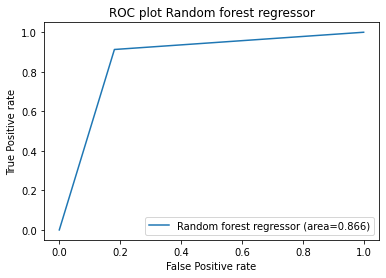

In [154]:
r_fpr,r_tpr,_=roc_curve(y_test,test_pred3)
r_auc=roc_auc_score(y_test,test_pred3)
plt.plot(r_fpr,r_tpr,label='Random forest regressor (area={:.3f})'.format(r_auc))
plt.title('ROC plot Random forest regressor')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# classification report

decision tree

In [169]:
print(classification_report(y_test,test_pred_decision_tree2))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       127
           1       0.82      0.81      0.82       149

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



knn

In [170]:
print(classification_report(y_test,g_res.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       127
           1       0.75      0.78      0.77       149

    accuracy                           0.74       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.74      0.74      0.74       276



gradient boosting

In [171]:
print(classification_report(y_test,g_res_grad.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       127
           1       0.87      0.91      0.89       149

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



gaussian naive bayes

In [172]:
print(classification_report(y_test,nbModel_grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       127
           1       0.88      0.85      0.86       149

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



logistic regression

In [173]:
print(classification_report(y_test,grid_result.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       127
           1       0.86      0.86      0.86       149

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



multilayer perceptron

In [174]:
print(classification_report(y_test,mp.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       127
           1       0.88      0.77      0.82       149

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



k-means

In [175]:
print(classification_report(y_test,test_pred4))

              precision    recall  f1-score   support

           0       0.50      0.94      0.66       127
           1       0.80      0.21      0.34       149

    accuracy                           0.55       276
   macro avg       0.65      0.58      0.50       276
weighted avg       0.66      0.55      0.48       276



random forest regressor

In [176]:
print(classification_report(y_test,test_pred3))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       127
           1       0.86      0.91      0.88       149

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



# Cross Validation

### Decision tree classifier

In [177]:
decision_tree=[]
for i in range(2,9):
  cv=cross_val_score(clf2,x_train,y_train,cv=i)
  decision_tree.append(cv.mean())

### Kneighbours

In [ ]:
kneighbours=[]
for i in range(2,9):
  cv=cross_val_score(g_res,x_train,y_train,cv=i)
  kneighbours.append(cv.mean())

### Guassian naive bayes

In [ ]:
guassian=[]
for i in range(2,9):
  cv=cross_val_score(nbModel_grid,x_train,y_train,cv=i)
  guassian.append(cv.mean())

### Comparison

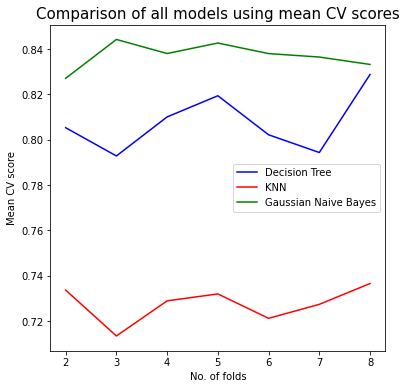

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
x=[i for i in range(2,9)]
plt.plot(x,decision_tree,color = 'Blue',label='Decision Tree')
plt.plot(x,kneighbours,color = 'Red',label='KNN')
plt.plot(x,guassian,color = 'Green',label='Gaussian Naive Bayes')
plt.ylabel("Mean CV score")
plt.xlabel("No. of folds")
plt.title('Comparison of all models using mean CV scores', size=15)
plt.legend()
plt.show()